In [84]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import coins, clock, horse, rocket
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.morphology import closing, square
from skimage.measure import regionprops, label
from skimage.color import lab2rgb
%matplotlib inline

In [85]:
def show(img, cmap=None):
    cmap = cmap or plt.cm.gray
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

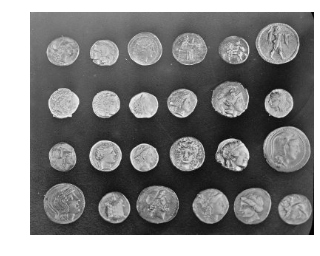

In [86]:
img = coins()
show(img)

In [87]:
threshold_otsu(img)

107

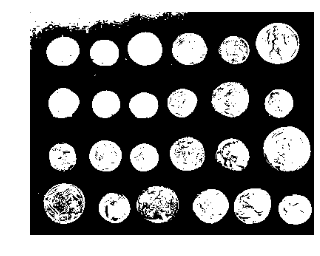

In [88]:
show(img>120)

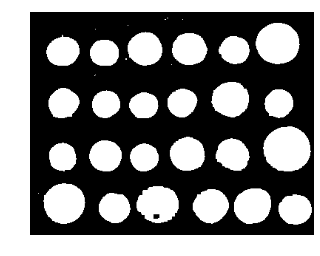

In [89]:
img_bin = clear_border(closing(img>120, square(5)))
show(img_bin)

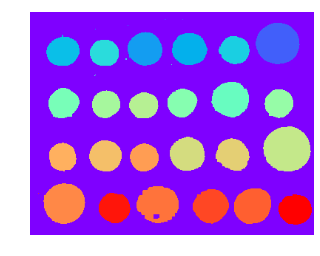

In [90]:
labels = label(img_bin)
show(labels, cmap=plt.cm.rainbow)

In [100]:
#regions = regionprops(labels, ['Area', 'BoundingBox'])
regions = regionprops(labels)
boxes = np.array([label['BoundingBox'] for label in regions if label['Area'] > 100])
print('There are {0:d} coins.'.format(len(boxes)))

There are 24 coins.


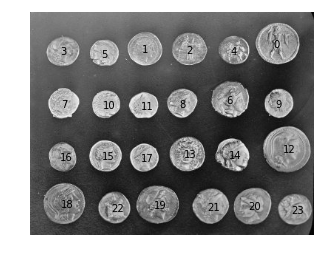

In [101]:
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
xs = boxes[:,[1,3]].mean(axis=1)
ys = boxes[:,[0,2]].mean(axis=1)
for i, box in enumerate(boxes):
    plt.text(xs[i]-5, ys[i]+5, str(i))